In [1]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

# import He WD table

In [2]:
heTable = pd.read_table('msp_galactic_binary_he_Mmed_2017June29_noZero_ecc_error_lt_50percent.txt',
                        header=None, sep='\s+',usecols=[1,3,5], names=['P','Ecc','M_c'])

# Period

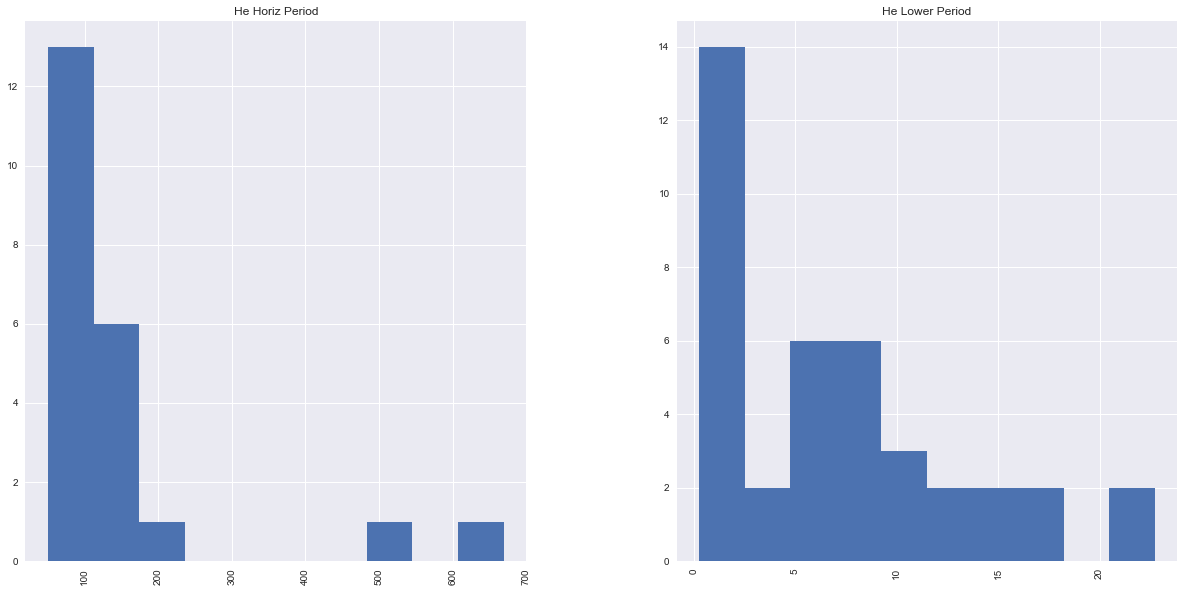

In [3]:
heLowerP = heTable['P'].loc[heTable['P'] < 25]
heHorizP = heTable['P'].loc[heTable['P'] > 25]

y1 = heLowerP
y2 = heHorizP
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['He Lower Period']*len(heLowerP), ['He Horiz Period']*len(heHorizP)]))

y.hist('value', by='group',figsize=(20,10));

In [4]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    Lower_mean = pm.Normal('Lower_mean', mu_m, sd=mu_s)
    Horiz_mean = pm.Normal('Horiz_mean', mu_m, sd=mu_s)
    
    Lower_std = pm.Uniform('Lower_std', lower=sigma_low, upper=sigma_high)
    Horiz_std = pm.Uniform('Horiz_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    Lower_lambda = Lower_std**-2
    Horiz_lambda = Horiz_std**-2
    
    Lower_group = pm.StudentT('Lower', nu=nu, mu=Lower_mean, lam=Lower_lambda, observed=y1)
    Horiz_group = pm.StudentT('Horiz', nu=nu, mu=Horiz_mean, lam=Horiz_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', Lower_mean - Horiz_mean)
    diff_of_stds = pm.Deterministic('difference of stds', Lower_std - Horiz_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((Lower_std**2 + Horiz_std**2) / 2))

In [5]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:09<00:00, 709.72it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11857d710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11cd97290>], dtype=object)

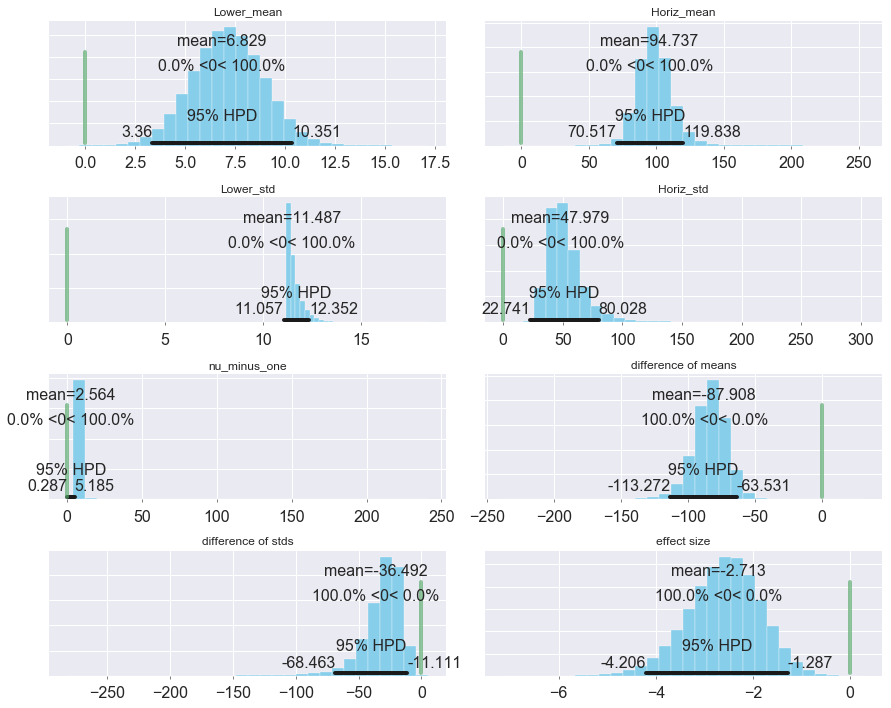

In [7]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b6cb1d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1157d8ad0>], dtype=object)

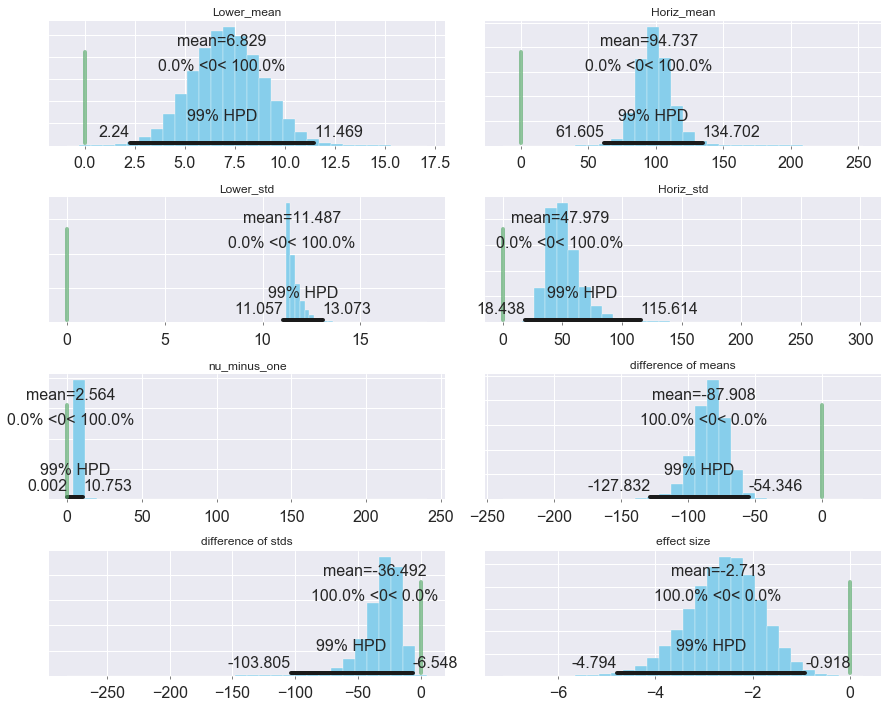

In [9]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Ecc

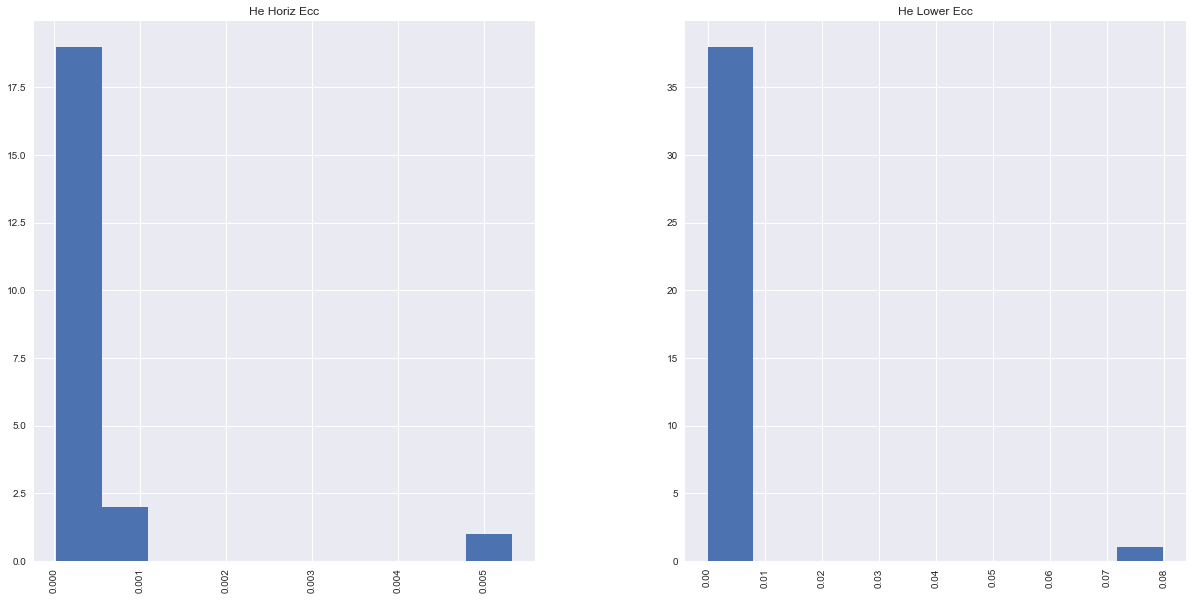

In [10]:
heLowerEcc = heTable['Ecc'].loc[heTable['P'] < 25]
heHorizEcc = heTable['Ecc'].loc[heTable['P'] > 25]

y1 = heLowerEcc
y2 = heHorizEcc
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['He Lower Ecc']*len(heLowerEcc), ['He Horiz Ecc']*len(heHorizEcc)]))

y.hist('value', by='group',figsize=(20,10));

In [11]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    Lower_mean = pm.Normal('Lower_mean', mu_m, sd=mu_s)
    Horiz_mean = pm.Normal('Horiz_mean', mu_m, sd=mu_s)
    
    Lower_std = pm.Uniform('Lower_std', lower=sigma_low, upper=sigma_high)
    Horiz_std = pm.Uniform('Horiz_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    Lower_lambda = Lower_std**-2
    Horiz_lambda = Horiz_std**-2
    
    Lower_group = pm.StudentT('Lower', nu=nu, mu=Lower_mean, lam=Lower_lambda, observed=y1)
    Horiz_group = pm.StudentT('Horiz', nu=nu, mu=Horiz_mean, lam=Horiz_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', Lower_mean - Horiz_mean)
    diff_of_stds = pm.Deterministic('difference of stds', Lower_std - Horiz_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((Lower_std**2 + Horiz_std**2) / 2))

In [12]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 95%|█████████▌| 209285/220000 [06:10<00:18, 565.30it/s]/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 2 does not match the target. It is 0.49151650488, but should be close to 0.8. Try to increase the number of tuning steps.
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 2 contains 210 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
100%|██████████| 220000/220000 [06:26<00:00, 569.88it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x112ee0990>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1286893d0>], dtype=object)

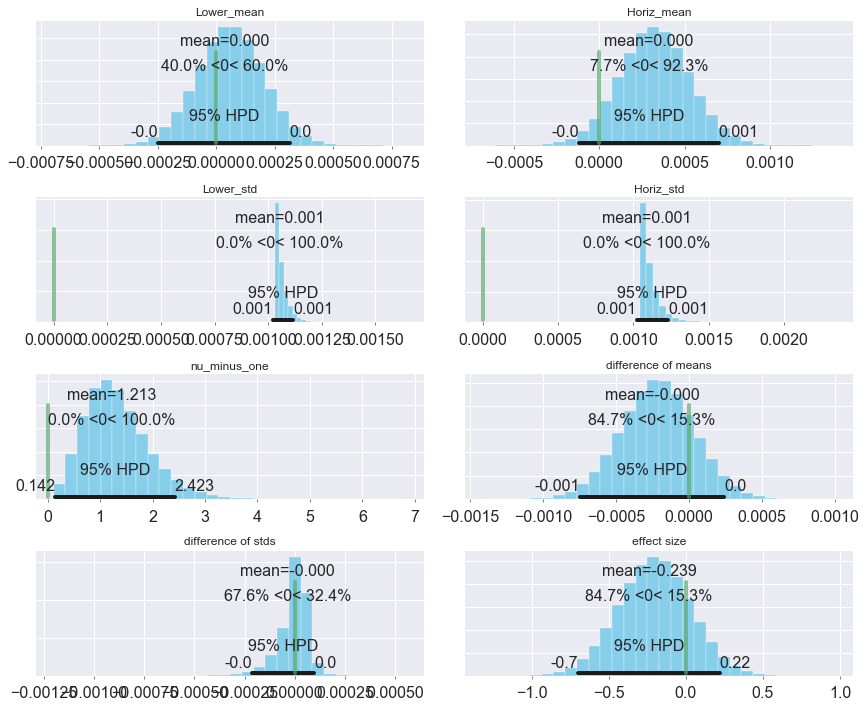

In [13]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12872bf10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1210e6b90>], dtype=object)

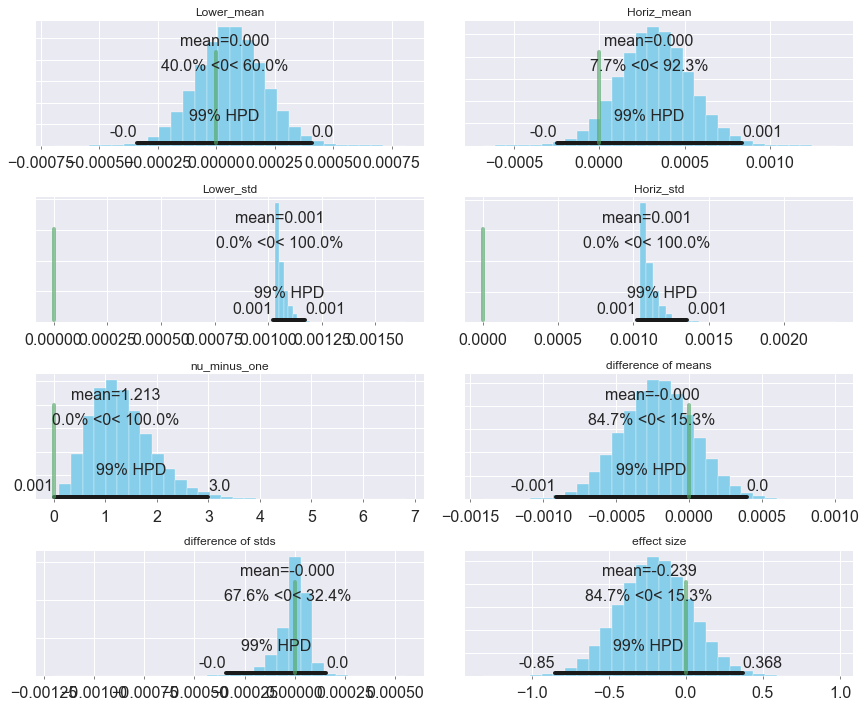

In [14]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# M_c

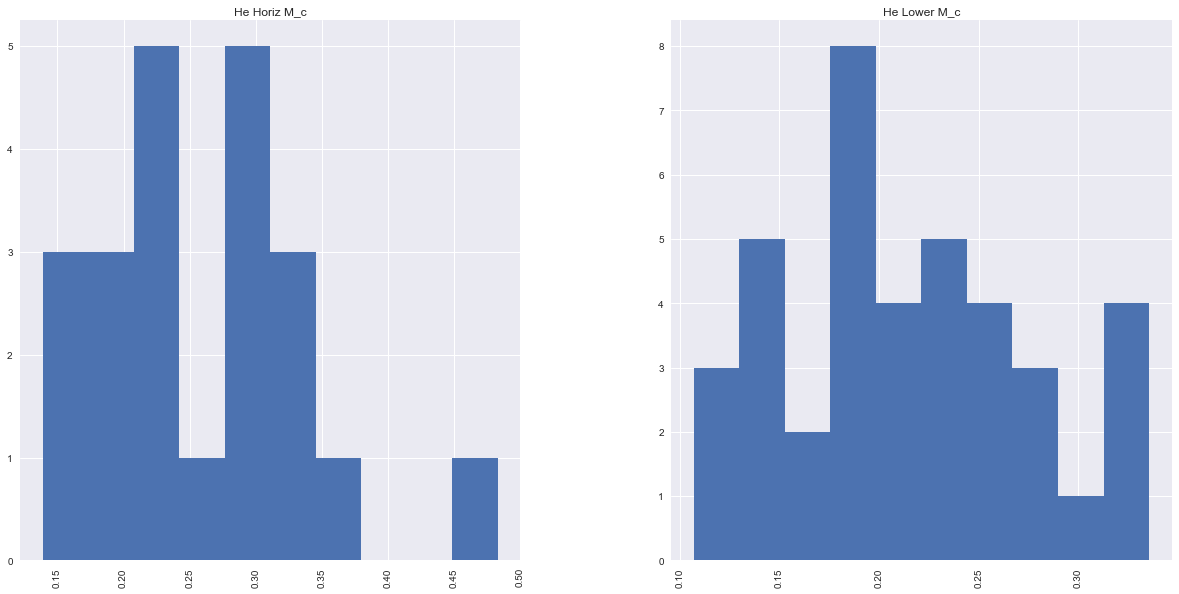

In [15]:
heLowerM_c = heTable['M_c'].loc[heTable['P'] < 25]
heHorizM_c = heTable['M_c'].loc[heTable['P'] > 25]

y1 = heLowerM_c
y2 = heHorizM_c
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['He Lower M_c']*len(heLowerM_c), ['He Horiz M_c']*len(heHorizM_c)]))

y.hist('value', by='group',figsize=(20,10));

In [16]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    Lower_mean = pm.Normal('Lower_mean', mu_m, sd=mu_s)
    Horiz_mean = pm.Normal('Horiz_mean', mu_m, sd=mu_s)
    
    Lower_std = pm.Uniform('Lower_std', lower=sigma_low, upper=sigma_high)
    Horiz_std = pm.Uniform('Horiz_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    Lower_lambda = Lower_std**-2
    Horiz_lambda = Horiz_std**-2
    
    Lower_group = pm.StudentT('Lower', nu=nu, mu=Lower_mean, lam=Lower_lambda, observed=y1)
    Horiz_group = pm.StudentT('Horiz', nu=nu, mu=Horiz_mean, lam=Horiz_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', Lower_mean - Horiz_mean)
    diff_of_stds = pm.Deterministic('difference of stds', Lower_std - Horiz_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((Lower_std**2 + Horiz_std**2) / 2))

In [17]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [04:15<00:00, 860.15it/s]
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 1 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11620aad0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116405c90>], dtype=object)

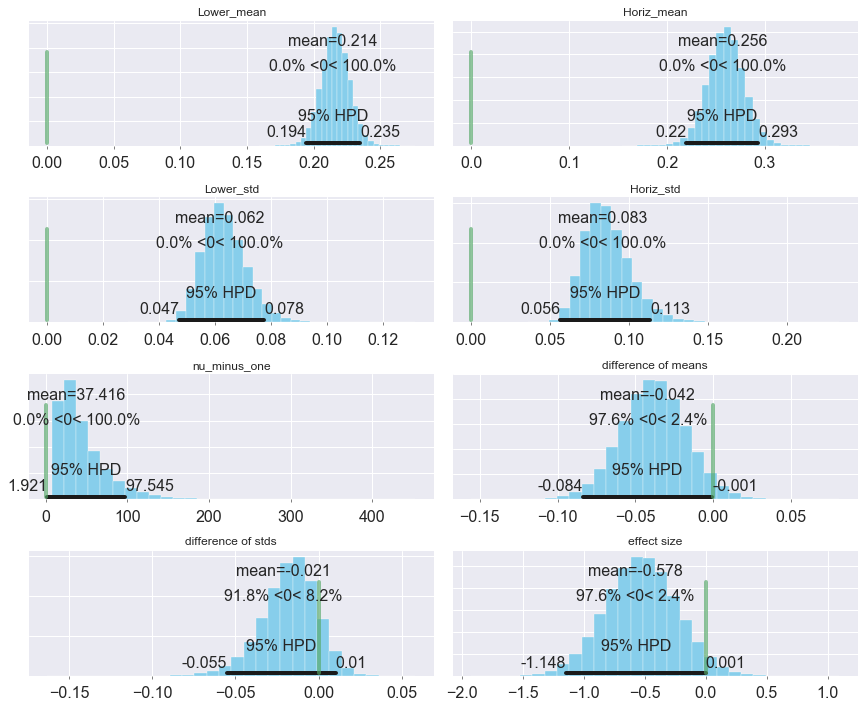

In [18]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1217b36d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12af70990>], dtype=object)

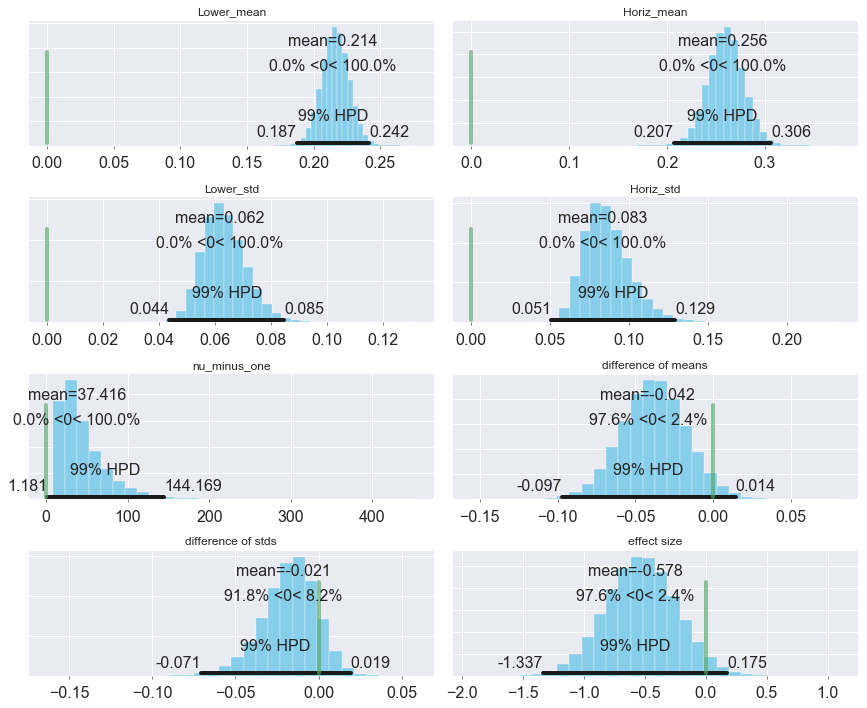

In [19]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log P

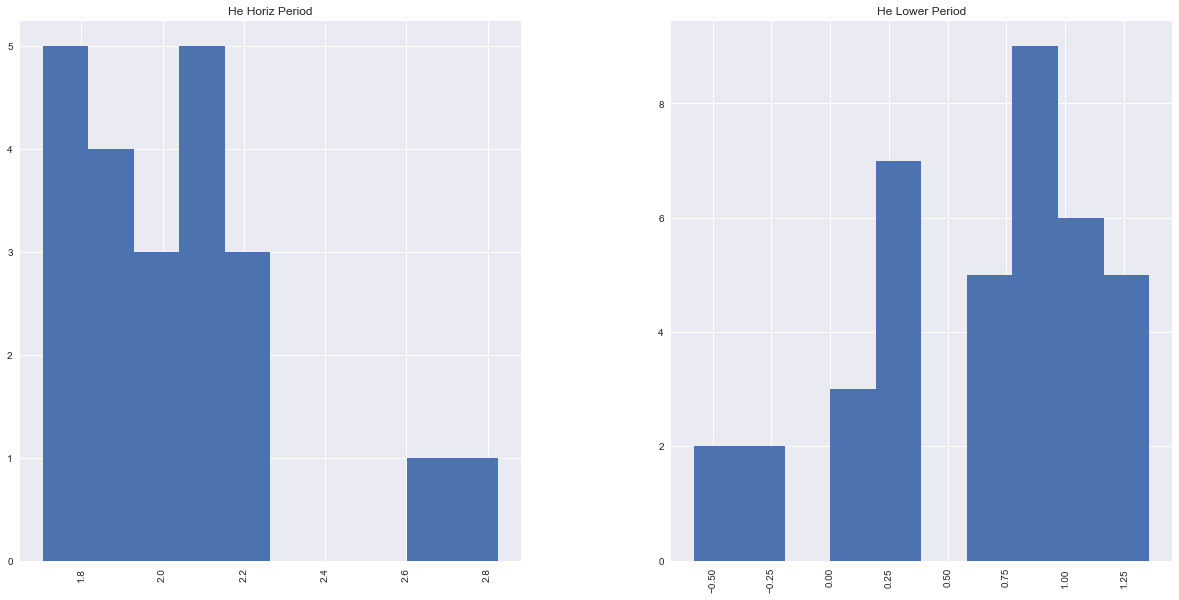

In [20]:
heLowerP = heTable['P'].loc[heTable['P'] < 25]
heHorizP = heTable['P'].loc[heTable['P'] > 25]

y1 = np.log10(heLowerP)
y2 = np.log10(heHorizP)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['He Lower Period']*len(heLowerP), ['He Horiz Period']*len(heHorizP)]))

y.hist('value', by='group',figsize=(20,10));

In [21]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    Lower_mean = pm.Normal('Lower_mean', mu_m, sd=mu_s)
    Horiz_mean = pm.Normal('Horiz_mean', mu_m, sd=mu_s)
    
    Lower_std = pm.Uniform('Lower_std', lower=sigma_low, upper=sigma_high)
    Horiz_std = pm.Uniform('Horiz_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    Lower_lambda = Lower_std**-2
    Horiz_lambda = Horiz_std**-2
    
    Lower_group = pm.StudentT('Lower', nu=nu, mu=Lower_mean, lam=Lower_lambda, observed=y1)
    Horiz_group = pm.StudentT('Horiz', nu=nu, mu=Horiz_mean, lam=Horiz_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', Lower_mean - Horiz_mean)
    diff_of_stds = pm.Deterministic('difference of stds', Lower_std - Horiz_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((Lower_std**2 + Horiz_std**2) / 2))

In [22]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:46<00:00, 635.64it/s]
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 2 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x126ca5290>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1194fe690>], dtype=object)

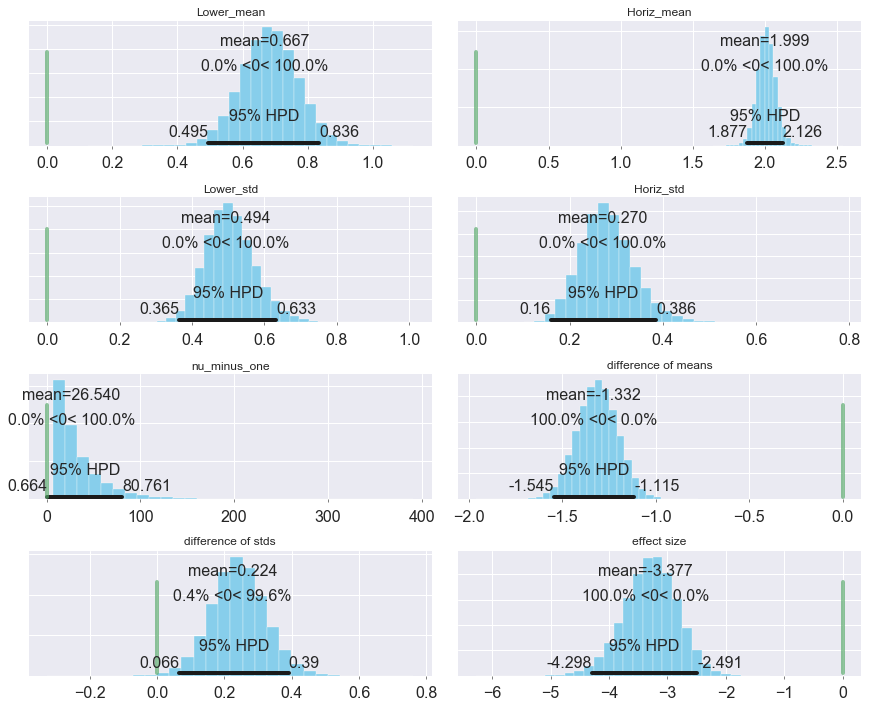

In [23]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12706d050>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1271f60d0>], dtype=object)

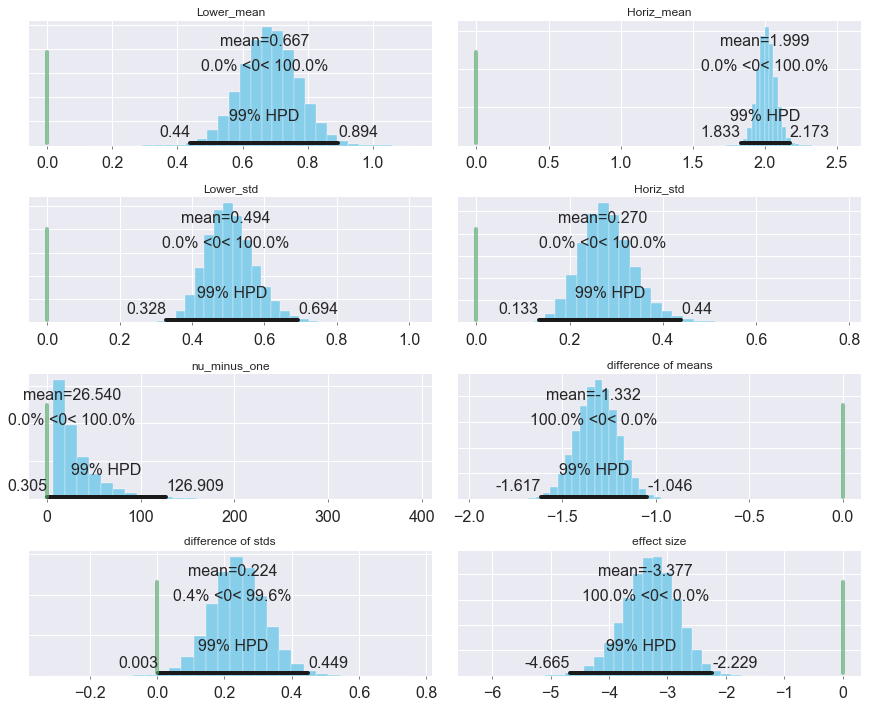

In [26]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log Ecc

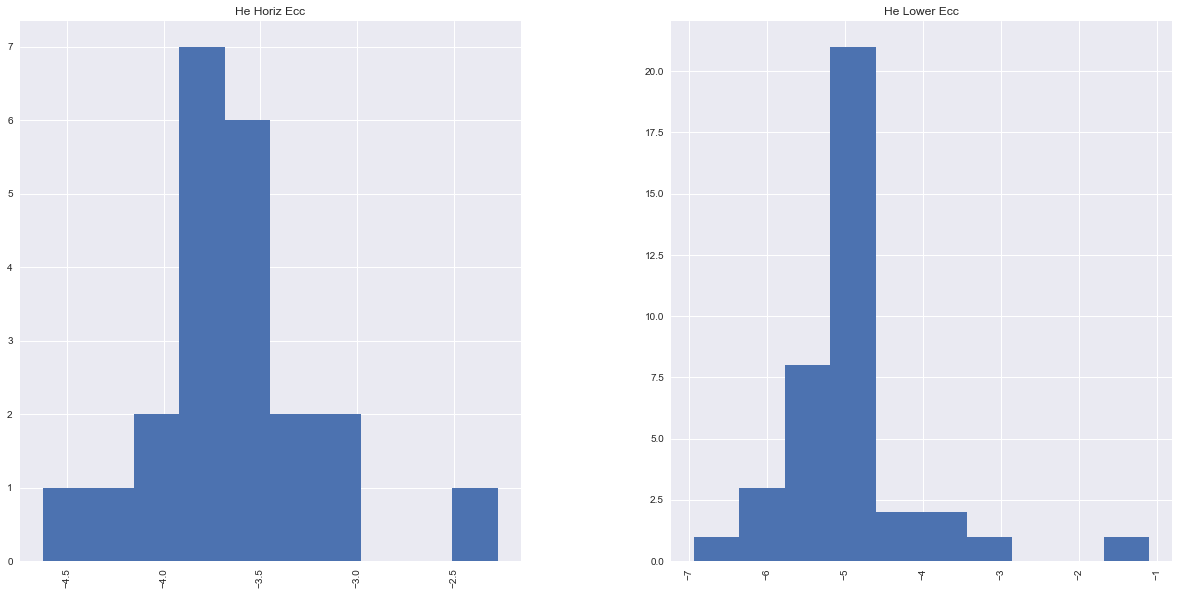

In [27]:
heLowerEcc = heTable['Ecc'].loc[heTable['P'] < 25]
heHorizEcc = heTable['Ecc'].loc[heTable['P'] > 25]

y1 = np.log10(heLowerEcc)
y2 = np.log10(heHorizEcc)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['He Lower Ecc']*len(heLowerEcc), ['He Horiz Ecc']*len(heHorizEcc)]))

y.hist('value', by='group',figsize=(20,10));

In [28]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    Lower_mean = pm.Normal('Lower_mean', mu_m, sd=mu_s)
    Horiz_mean = pm.Normal('Horiz_mean', mu_m, sd=mu_s)
    
    Lower_std = pm.Uniform('Lower_std', lower=sigma_low, upper=sigma_high)
    Horiz_std = pm.Uniform('Horiz_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    Lower_lambda = Lower_std**-2
    Horiz_lambda = Horiz_std**-2
    
    Lower_group = pm.StudentT('Lower', nu=nu, mu=Lower_mean, lam=Lower_lambda, observed=y1)
    Horiz_group = pm.StudentT('Horiz', nu=nu, mu=Horiz_mean, lam=Horiz_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', Lower_mean - Horiz_mean)
    diff_of_stds = pm.Deterministic('difference of stds', Lower_std - Horiz_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((Lower_std**2 + Horiz_std**2) / 2))

In [29]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:36<00:00, 654.55it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1244abf90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x115fb7850>], dtype=object)

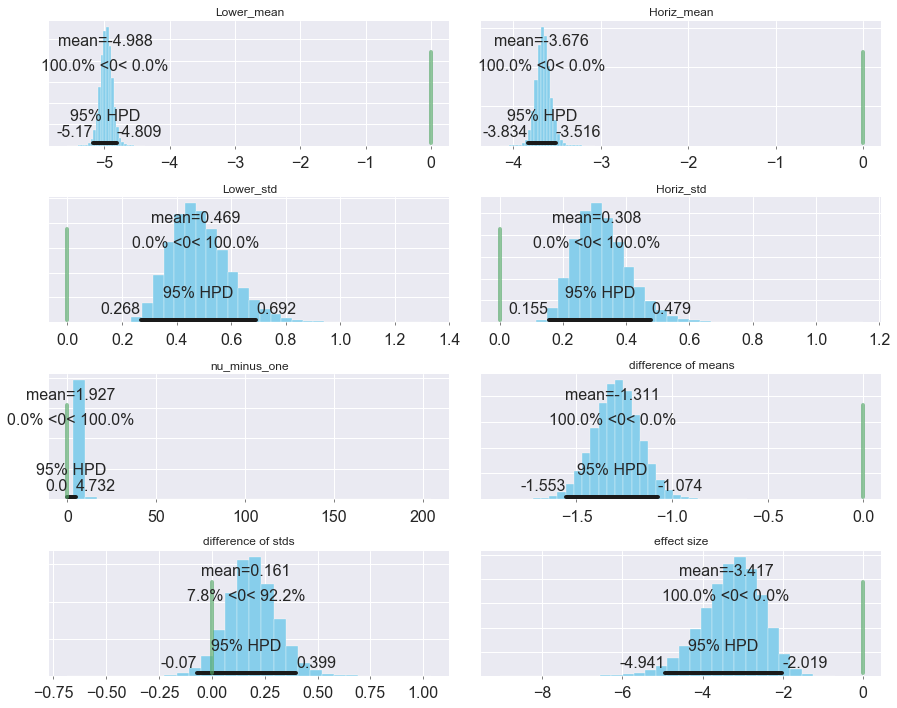

In [30]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11608a450>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x113df5910>], dtype=object)

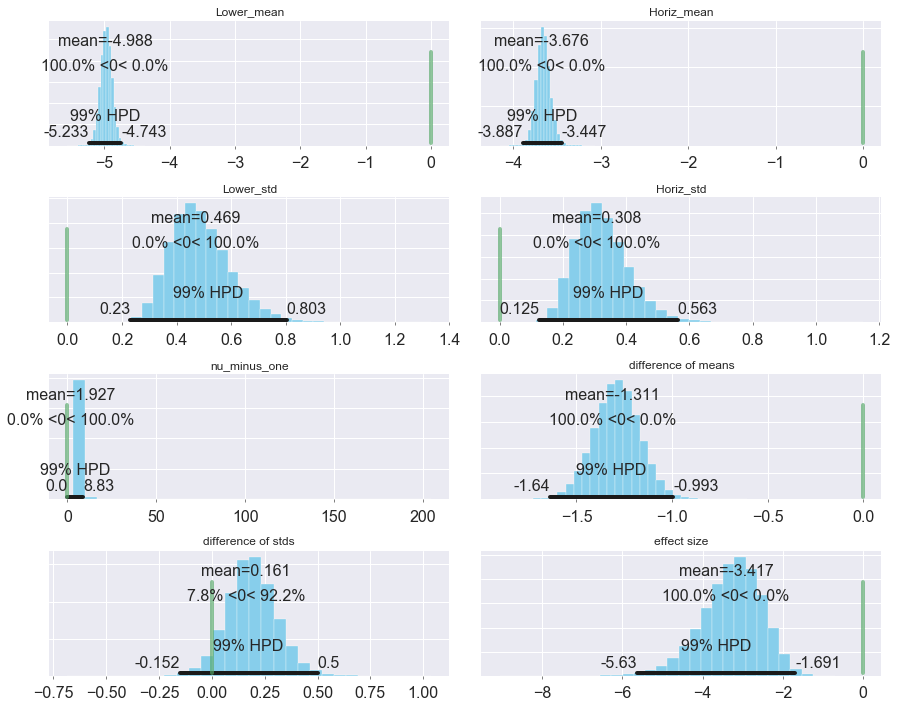

In [31]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log M_c

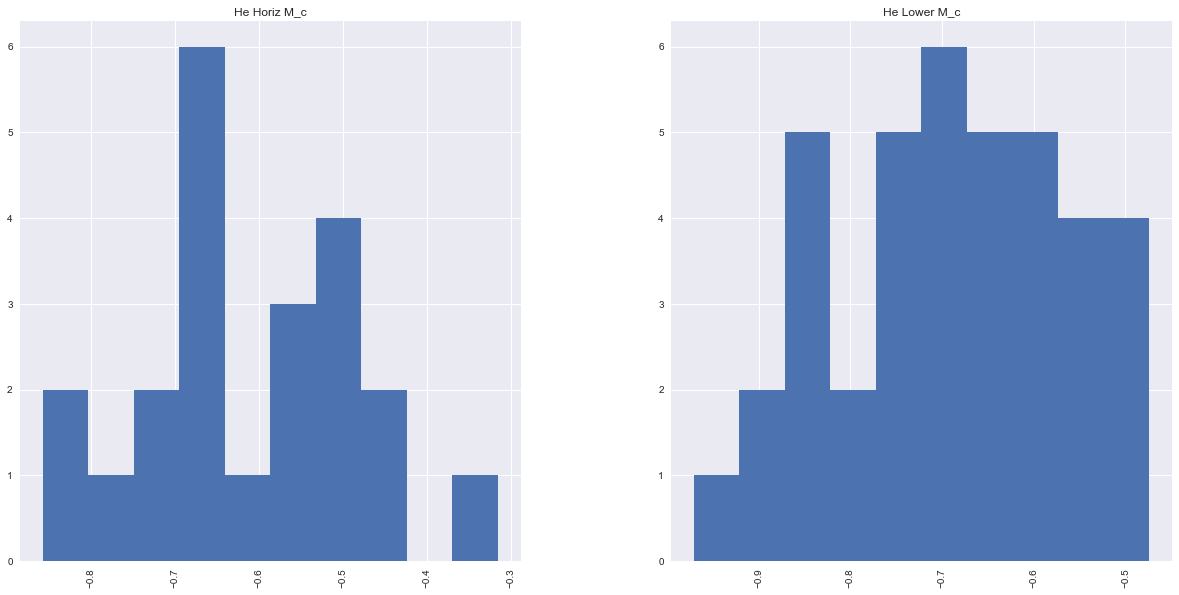

In [32]:
heLowerM_c = heTable['M_c'].loc[heTable['P'] < 25]
heHorizM_c = heTable['M_c'].loc[heTable['P'] > 25]

y1 = np.log10(heLowerM_c)
y2 = np.log10(heHorizM_c)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['He Lower M_c']*len(heLowerM_c), ['He Horiz M_c']*len(heHorizM_c)]))

y.hist('value', by='group',figsize=(20,10));

In [33]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    Lower_mean = pm.Normal('Lower_mean', mu_m, sd=mu_s)
    Horiz_mean = pm.Normal('Horiz_mean', mu_m, sd=mu_s)
    
    Lower_std = pm.Uniform('Lower_std', lower=sigma_low, upper=sigma_high)
    Horiz_std = pm.Uniform('Horiz_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    Lower_lambda = Lower_std**-2
    Horiz_lambda = Horiz_std**-2
    
    Lower_group = pm.StudentT('Lower', nu=nu, mu=Lower_mean, lam=Lower_lambda, observed=y1)
    Horiz_group = pm.StudentT('Horiz', nu=nu, mu=Horiz_mean, lam=Horiz_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', Lower_mean - Horiz_mean)
    diff_of_stds = pm.Deterministic('difference of stds', Lower_std - Horiz_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((Lower_std**2 + Horiz_std**2) / 2))

In [34]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [04:47<00:00, 766.32it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x125844210>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x126f16490>], dtype=object)

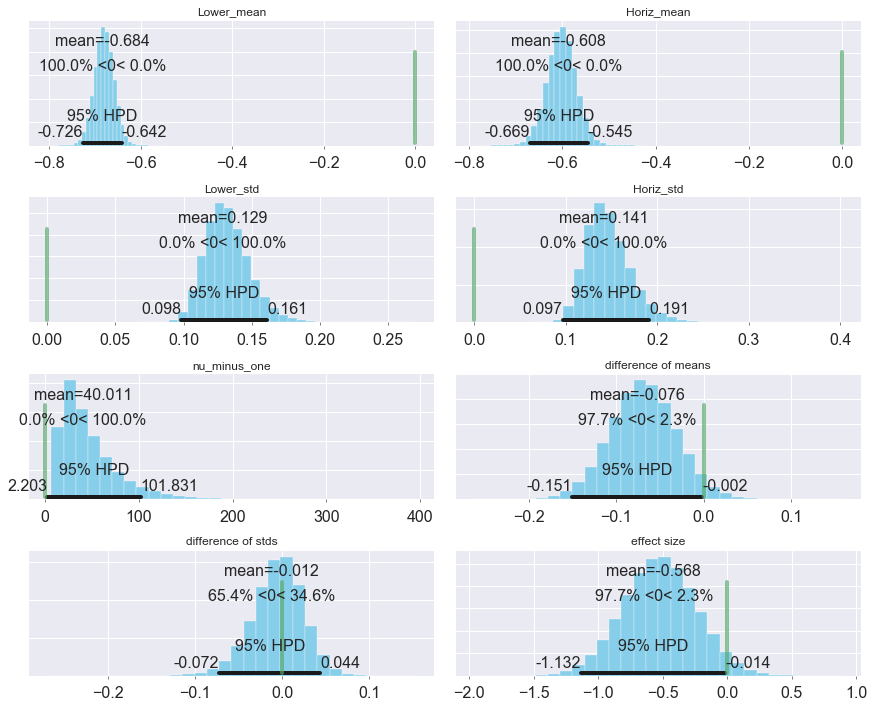

In [35]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x127813790>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x127660950>], dtype=object)

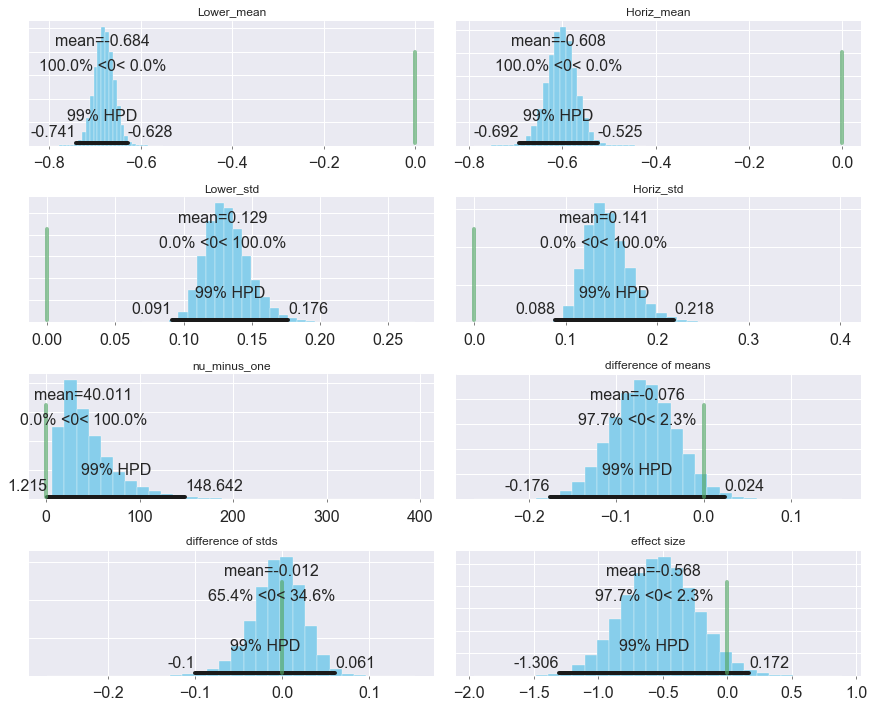

In [36]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')